In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import colormaps as cmp

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.manifold import TSNE

sns.set_theme(style='whitegrid')

In [51]:
data = pd.read_csv('data/2024_07/all_time_men_800m.csv')

In [52]:
plot_data = data.copy()[['Rank', 'Mark_Seconds', 'Competitor', 'DOB', 'Nat', 'Venue', 'Date']]
plot_data.head()

,Rank,Mark_Seconds,Competitor,DOB,Nat,Venue,Date
0,1,100.91,David RUDISHA,17 DEC 1988,KEN,"Olympic Stadium, London (GBR)",09 AUG 2012
1,2,101.01,David RUDISHA,17 DEC 1988,KEN,"Stadio Guidobaldi, Rieti (ITA)",29 AUG 2010
2,3,101.09,David RUDISHA,17 DEC 1988,KEN,"Olympiastadion, Berlin (GER)",22 AUG 2010
3,4,101.11,Wilson KIPKETER,12 DEC 1972,DEN,Köln (GER),24 AUG 1997
4,5,101.24,Wilson KIPKETER,12 DEC 1972,DEN,Zürich (SUI),13 AUG 1997


In [53]:
def convert_datetimes(row):
    try:
        val = pd.to_datetime(row, format='%d %b %Y')
    except ValueError:
        val = pd.to_datetime(row, format='%Y')

    return val

In [54]:
plot_data['DOB'] = plot_data['DOB'].apply(convert_datetimes)
plot_data['Date'] = plot_data['Date'].apply(convert_datetimes)
plot_data['DOB_year'] = plot_data['DOB'].dt.year
plot_data['DOB_month'] = plot_data['DOB'].dt.month
plot_data['DOB_day'] = plot_data['DOB'].dt.day
plot_data['Date_year'] = plot_data['Date'].dt.year
plot_data['Date_month'] = plot_data['Date'].dt.month
plot_data['Date_day'] = plot_data['Date'].dt.day

In [55]:
plot_data[['comp_id', 'nat_id', 'ven_id']] = plot_data[['Competitor', 'Nat', 'Venue']]. \
    apply(LabelEncoder().fit_transform)

In [64]:
plot_data.dropna(inplace=True)
plot_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8157 entries, 0 to 8161
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Rank          8157 non-null   int64         
 1   Mark_Seconds  8157 non-null   float64       
 2   Competitor    8157 non-null   object        
 3   DOB           8157 non-null   datetime64[ns]
 4   Nat           8157 non-null   object        
 5   Venue         8157 non-null   object        
 6   Date          8157 non-null   datetime64[ns]
 7   DOB_year      8157 non-null   float64       
 8   DOB_month     8157 non-null   float64       
 9   DOB_day       8157 non-null   float64       
 10  Date_year     8157 non-null   int32         
 11  Date_month    8157 non-null   int32         
 12  Date_day      8157 non-null   int32         
 13  comp_id       8157 non-null   int32         
 14  nat_id        8157 non-null   int32         
 15  ven_id        8157 non-null   int32        

In [65]:
plot_data[['tsne_x', 'tsne_y']] = TSNE(
    n_components=2,
    learning_rate='auto',
    perplexity=45,
    init='pca',
    random_state=69420
).fit_transform(plot_data.select_dtypes(['int', 'float']))

In [123]:
def tsne_exploration(col):
    data = plot_data.loc[plot_data['Rank'] <= 500]

    plt.figure(figsize=(5,7))
    plt.title("TSNE of Men's All-Time 800m Times")
    plt.scatter(
        x=data['tsne_x'], 
        y=data['tsne_y'], 
        c=data[col],
        cmap=cmp['cividis'].reversed()
    )
    plt.colorbar(orientation='horizontal')
    plt.show()

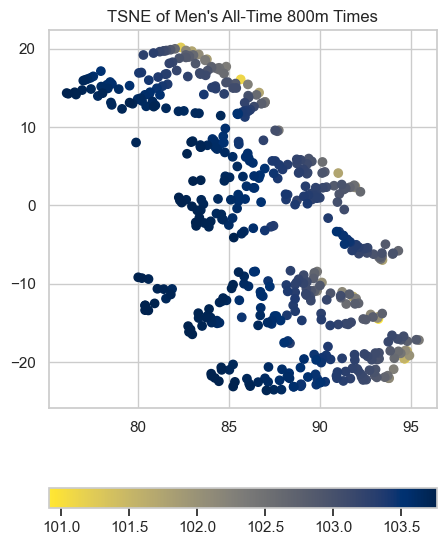

In [124]:
tsne_exploration('Mark_Seconds')

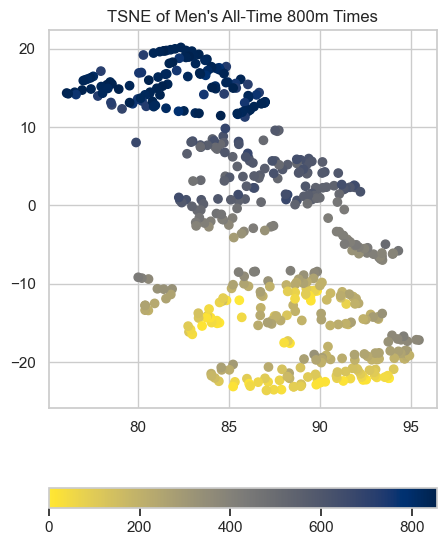

In [125]:
tsne_exploration('comp_id')

Clear vertical striations from competitor id, consider removing in the future or selecting the top performance from each athlete

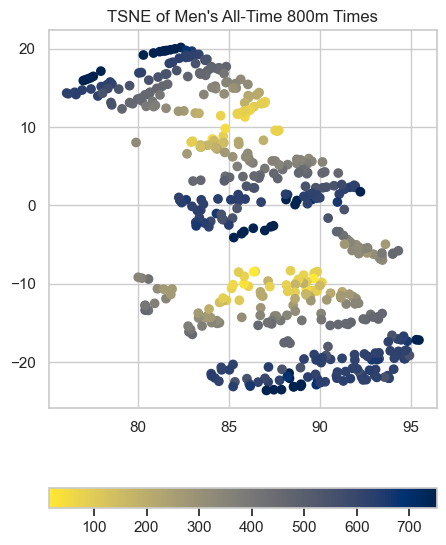

In [126]:
tsne_exploration('ven_id')

Maybe something about venues. Prolly just that high competition races produce faster results in the same venue. 